In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
bikes = pd.read_csv('hour.csv')

In [4]:
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
bikes_prep = bikes.copy()


In [9]:
bikes_prep = bikes_prep.drop(['index','date','casual','registered'], axis=1)

In [7]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [10]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

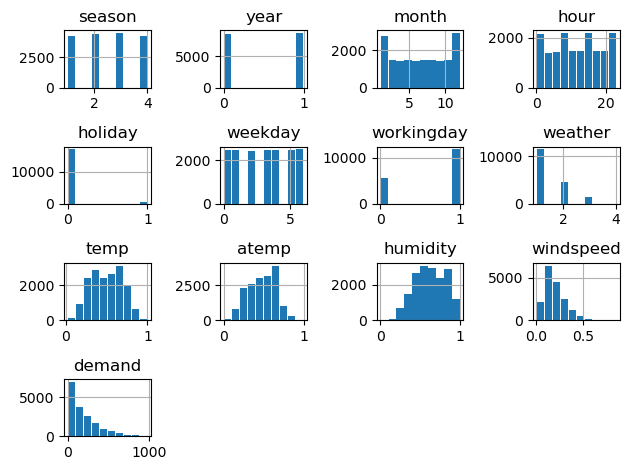

In [10]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

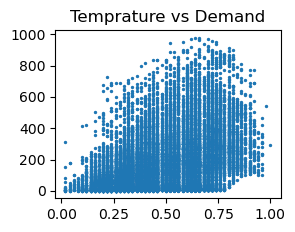

In [12]:
plt.subplot(2,2,1)
plt.title('Temprature vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'], s=2, c='g')

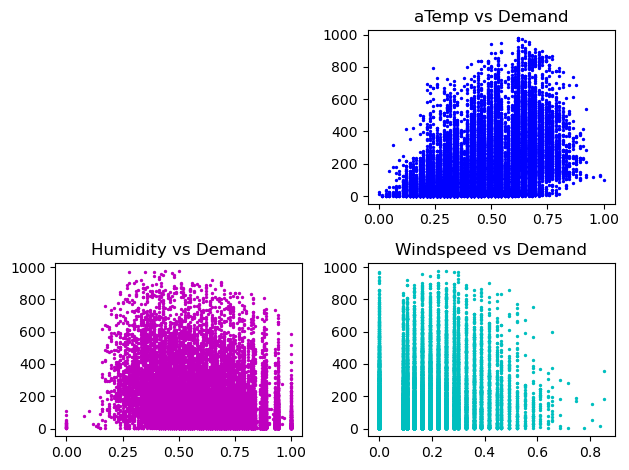

In [14]:
plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'], s=2, c='c')

plt.tight_layout()

<BarContainer object of 4 artists>

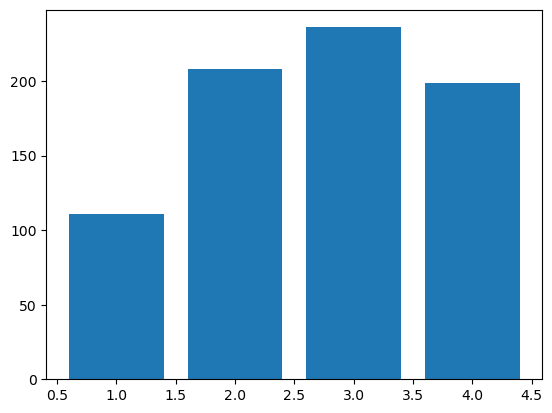

In [15]:
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_average)

<BarContainer object of 4 artists>

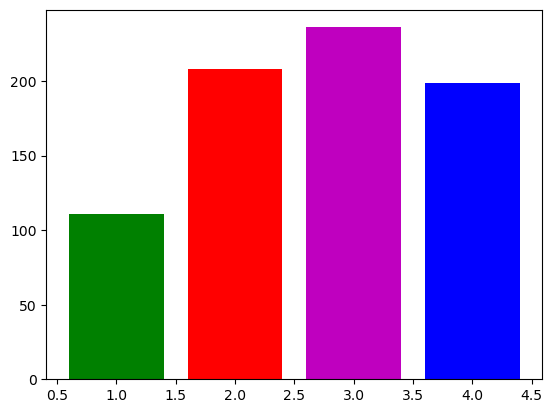

In [16]:
colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list,cat_average,color=colors)

In [10]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [11]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [12]:
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [13]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [14]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'], axis=1)

In [15]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474696, 0.47049534, 0.4962279 , 0.4940404 , 0.46795923,
        0.47732025, 0.5267575 , 0.59145725, 0.65201557, 0.71519524,
        0.80591   , 0.9253094 , 1.        , 0.9253094 , 0.80591   ,
        0.71519524, 0.65201557, 0.59145725, 0.5267575 , 0.47732025,
        0.46795923, 0.4940404 , 0.4962279 , 0.47049534, 0.45474696],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x262871cec90>)

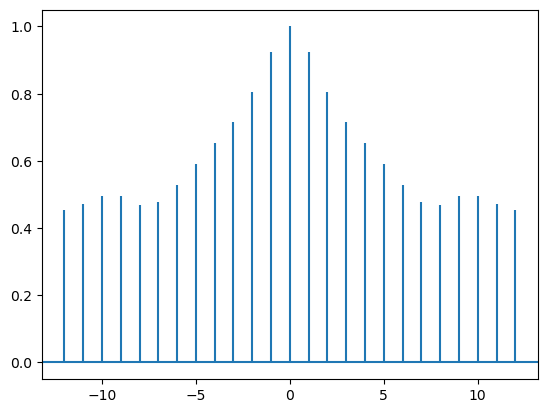

In [16]:
df1=pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(df1,maxlags=12)

<Axes: >

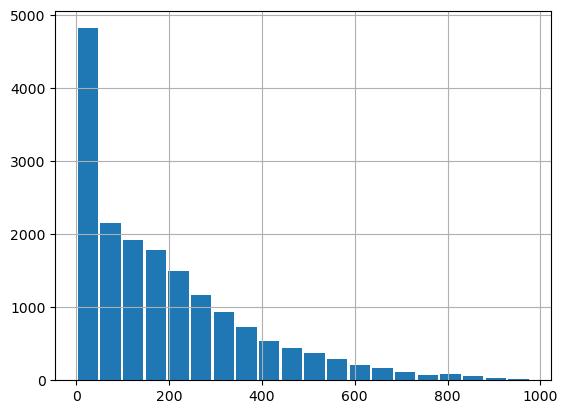

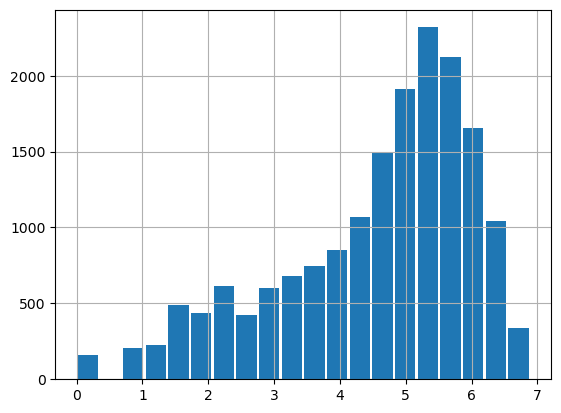

In [17]:
df1=bikes_prep['demand']
df2=np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [18]:
bikes_prep['demand']= np.log(bikes_prep['demand'])

In [19]:
bikes_prep['demand']

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17379, dtype: float64

In [11]:
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3])

bikes_prep_lag = bikes_prep_lag.dropna()

In [22]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3


In [24]:
bikes_prep_lag.dtypes
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [25]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3


In [12]:
  y = bikes_prep_lag[['demand']]
  x = bikes_prep_lag.drop(['demand'], axis=1)

In [13]:
tr_size = 0.7*len(x)

In [14]:
tr_size = int(tr_size)
tr_size

0

In [15]:
x_train = x.values[0:tr_size]
x_test = x.values[tr_size : len(x)]

y_train = y.values[0:tr_size]
y_test = y.values[tr_size : len(y)]

In [16]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(x_train, y_train)

r2_train = std_reg.score(x_train, y_train)
r2_test = std_reg.score(x_test, y_test)

y_predict = std_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_predict))

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by LinearRegression.

In [1]:
y_test_e = []
y_predict_e = []

for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
    
    
    

NameError: name 'y_test' is not defined

In [3]:
log_sq_sum = 0.0

for i in range(0, len(y_test_e)):
    log_a  =  math.log(y_test_e[i]+1)
    log_p = math.log(y_predict_e[i] + 1)
    log_diff = (log_p  -   log_a)**2
    log_sq_sum  = log_sq_sum + log_diff
    
rsmle = log_sq_sum/len(y_test)    

print(" ")
print(rmsle)

NameError: name 'y_test' is not defined